<a href="https://colab.research.google.com/github/JohanFendi/Mnist/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
picture_vectors, labels = mnist.data, mnist.target

#Check for missing data
print(picture_vectors.shape)
print(labels.shape)

(70000, 784)
(70000,)


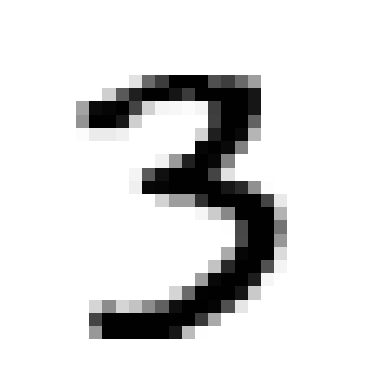

In [ ]:
import matplotlib.pyplot as plt

def plot_picture(picture_vector, x_dim, y_dim):
  image = picture_vector.reshape(y_dim, x_dim)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

random_digit = picture_vectors[10000]
x_dim = y_dim = 28
plot_picture(random_digit, x_dim, y_dim)
#plt.show()

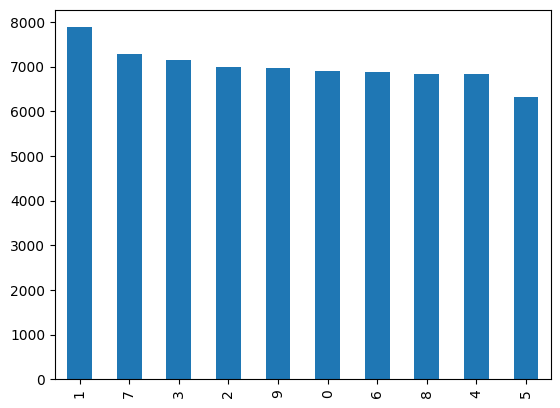

In [ ]:
import pandas as pd

pd_frame = pd.Series(labels)
pd_frame.value_counts().plot(kind="bar")
plt.show() #Check for skew

In [ ]:
x_train, x_test, y_train, y_test = picture_vectors[:60000], picture_vectors[60000:], labels[:60000], labels[60000:]

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

kNclassifier = KNeighborsClassifier()
predictions = cross_val_predict(kNclassifier, x_train, y_train, cv = 3)
cm = confusion_matrix(y_train, predictions)


[[5882    4    5    0    1    5   19    1    2    4]
 [   2 6705   10    2    1    1    3   11    2    5]
 [  51   60 5695   15   11    4    9   87   17    9]
 [   8   16   39 5903    1   63    4   40   33   24]
 [   3   53    1    1 5628    0   13   11    2  130]
 [  14   18    4   67    6 5211   58    7   11   25]
 [  24   13    1    0    5   27 5846    0    2    0]
 [   4   68   14    3   20    1    0 6083    3   69]
 [  25   85   15   87   35  111   26   19 5382   66]
 [  19   13    5   45   46   12    5   79   15 5710]]


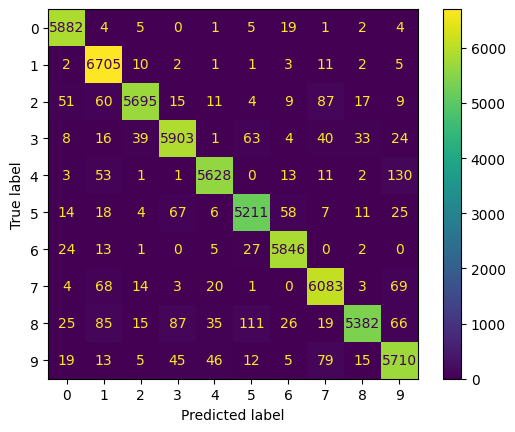

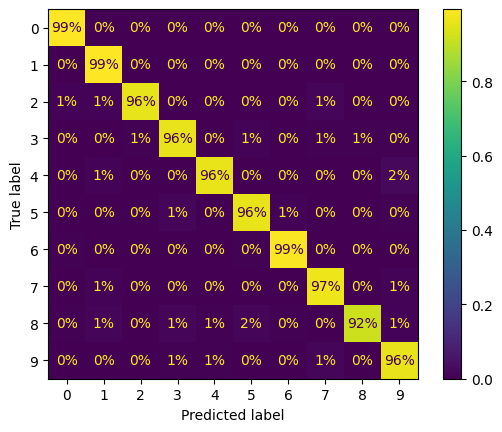

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, predictions)
ConfusionMatrixDisplay.from_predictions(y_train, predictions, normalize="true", values_format=".0%")

In [ ]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
print(f1_score(y_train, predictions, average="macro"))
print(recall_score(y_train, predictions, average="macro"))
print(precision_score(y_train, predictions, average="macro"))
print(accuracy_score(y_train, predictions))

0.9672164755274893
0.9669341316176434
0.967895609653832
0.9674166666666667


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    "n_neighbors": randint(2,20),
    "weights" : ["uniform", "distance"]
}

grid_search_KNN = RandomizedSearchCV(kNclassifier, param_grid, cv=3, n_iter=50)
grid_search_KNN.fit(x_train, y_train)